In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("train.csv", usecols=["GarageQual", "FireplaceQu", "SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [52]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Finding what is the mode in GarageQual column

Plotting a simple graph to see that

Text(0, 0.5, 'Number of houses')

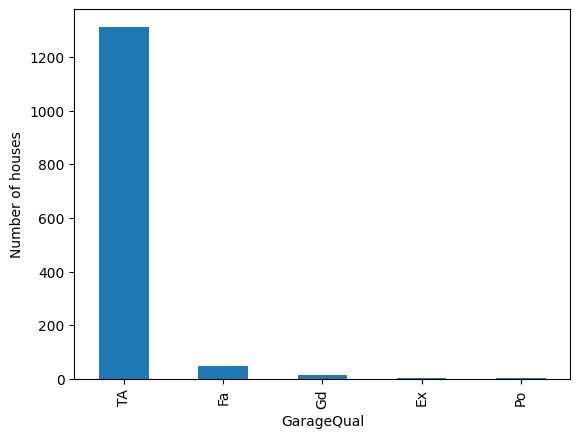

In [53]:
df["GarageQual"].value_counts().plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")

In [54]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

Now we clearly know TA is the mode

<Axes: xlabel='SalePrice', ylabel='Density'>

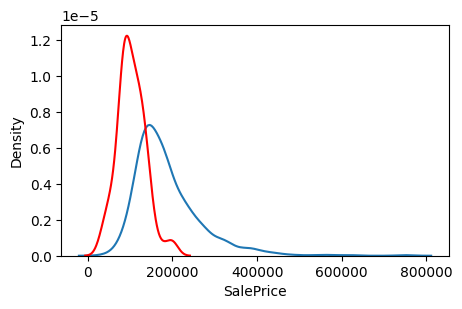

In [55]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 3))

sns.kdeplot(df[df["GarageQual"] == "TA"]["SalePrice"], ax=ax1)
sns.kdeplot(df[df["GarageQual"].isnull()]["SalePrice"], ax=ax1, color="red")

Storing the "before"

In [56]:
# Storing the "before"
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

In [57]:
df["GarageQual"].fillna("TA", inplace=True)

<Axes: xlabel='GarageQual'>

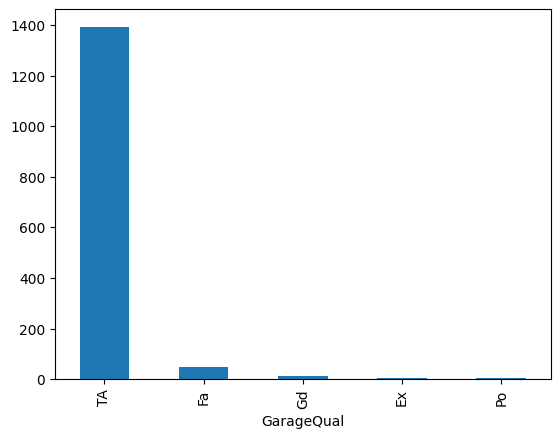

In [58]:
df["GarageQual"].value_counts().plot.bar()

Look obv the TA value count increased cuz we added more TA values (in the place of nulls)

<Axes: xlabel='SalePrice', ylabel='Density'>

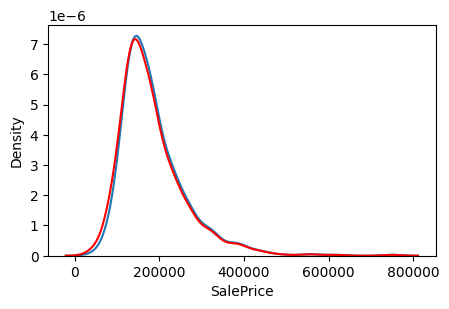

In [63]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 3))

sns.kdeplot(temp, ax=ax1)
sns.kdeplot(df[df["GarageQual"] == "TA"]["SalePrice"], ax=ax1, color="red")

#### Didn't change much because there were not many missing values in GarageQual

#### Now lets try in column FireplaceQu

Finding mode

<Axes: xlabel='FireplaceQu'>

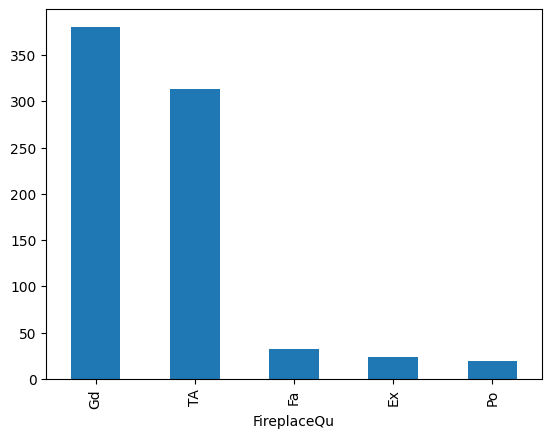

In [64]:
df["FireplaceQu"].value_counts().plot.bar()

But here there is a problem : two categories are frequent. Can't do anything. This actually shouldn't happen when finding mode to use most frequent value imputation

In [65]:
df["FireplaceQu"].mode()

0    Gd
Name: FireplaceQu, dtype: object

<Axes: xlabel='SalePrice', ylabel='Density'>

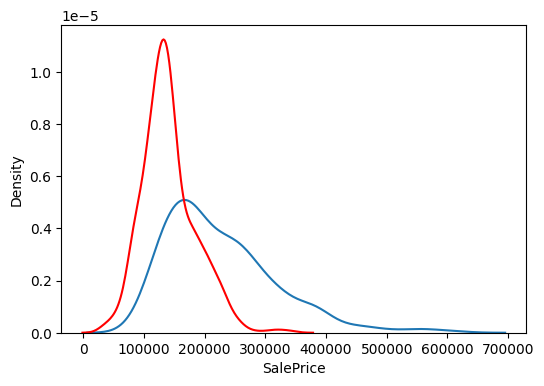

In [67]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.kdeplot(df[df["FireplaceQu"] == "Gd"]["SalePrice"], ax=ax1)
sns.kdeplot(df[df["FireplaceQu"].isnull()]["SalePrice"], ax=ax1, color="red")

In [68]:
beforeImputation = df[df["FireplaceQu"] == "Gd"]["SalePrice"]

In [69]:
df["FireplaceQu"].fillna("Gd", inplace=True)

<Axes: xlabel='FireplaceQu'>

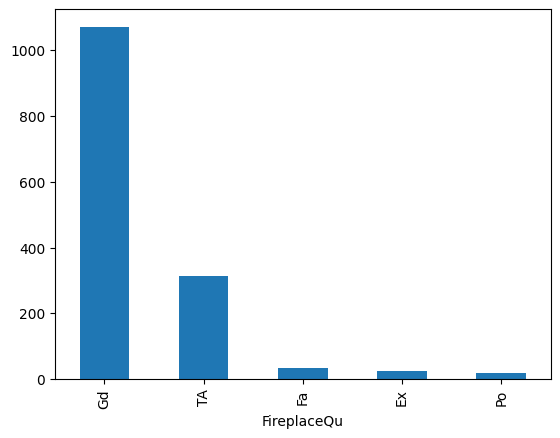

In [70]:
df["FireplaceQu"].value_counts().plot.bar()

Gd count has increased

<Axes: xlabel='SalePrice', ylabel='Density'>

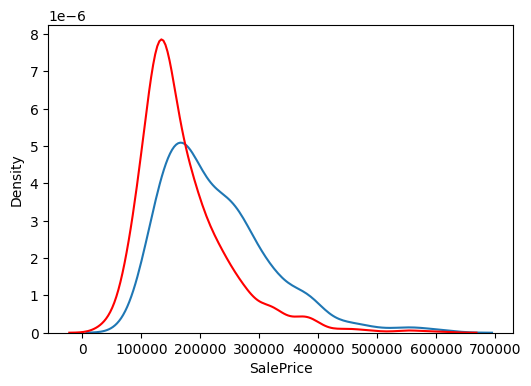

In [72]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

sns.kdeplot(beforeImputation, ax=ax1)
sns.kdeplot(df[df["FireplaceQu"] == "Gd"]["SalePrice"], ax=ax1, color="red")

#### Not good result because of that problem

### Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["SalePrice"]),
    df["SalePrice"],
    test_size=0.2
)

In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy="most_frequent")

In [76]:
X_train_transformed = imputer.fit_transform(X_train)
X_test_transformed = imputer.fit_transform(X_train)

In [77]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)